# Beyond ETFs Case Exam

**Class:** P720 - Strategic Management

**Professor:** Dr. Goran Calic

**Author:** Patrick Carter - 0857124

**Date:** April 8, 2020

## 1. Introduction

The current business process at Brockmann & Company to determine which stocks to buy, which to hold, and which to sell is manually intensive. It requires Wilf Brockmann to select which stocks to analyze and run a model on a proprietary software application. This application calculates the price momentum for each stock and ranks the stocks against each other. Wilf then exports this calculation as a flat file and emails the result to Peter who uploads the file to the iPhone application. This process is required to occur every night to ensure the app has the latest buy-hold-sell results from the previous days trading. This process adds overhead and risk to the business model. 

The purpose of this [jupyter notebook](https://jupyter.org/) is to automate the selection of stocks, automate the calculation and ranking of the stocks, automate the flat file export, and automate the email process. The automation leverages Python for scripting, Microsoft Excel as a front end configuration interface, and Windows Task Scheduler to . If this script is placed on the same server that hosts the iPhone application, the email process would not be required and could proceed without any human intervention on both sides. 

## 2. Price Momentum Science

From Wilfred P. Brockmann's white paper "[Introducting The Brockmann Method: How I Consistently Beat The Index And So Can You](https://www.brockmann.com/wp-content/uploads/2018/01/BrockmannMethod_011518.pdf)", 'Price Momentum' is

*...stocks with prices that have been rising for the past 6-12 months are LIKELY to continue to rise for the next 6-12 months while stocks with prices that have been falling for the past 6-12 months are LIKELY to continue to fall for the next 6-12 months.*

The white paper also gives credit to Tobias Moskowitz and an article written in the Investment Management Consultants Association’s Investments & Wealth Monitor. The article in question was made freely available at an [online financial advice journal Riabiz](https://riabiz.com/a/2010/9/8/a-style-for-all-markets-momentum-investing). 

This article introduces the original work on Price Momentum by Jegadeesh and Titman in 1993 "[Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency](http://www.e-m-h.org/JeTi93.pdf)". This work concludes that buying stocks that have performed well and selling past losers provided abnormally high returns from 1965 to 1989. The returns were found to be dependent on the time period selected with the most positive being in the first 12 months (with the exception of the first month) and dissipates within the following 2 years.

### 2.1 Price Momentum

The concept of price momentum is inherently simple. It is defined as the speed at which a stock price changes. It is therefore the difference of the current price of a stock and the price of the stock some period of time ago. It is used by investors to understand the direction and magnitude of the price trend. It is based on the assumption that the stock market is not efficient. It assumes investors overreact to news and behave as a "heard". It is therefore possible to achieve returns when buying stocks that show positive price momentum.  

The formula for price momentum is:
> $$Momentum = V - V_{x}$$

where

> $V$ = Latest Closing Price,     $V_x$ = Closing Price $x$ Number of Days Ago

In order to compare stocks that trade at different prices, it is useful to normalize the value by dividing the price momentum by the price of the stock X days ago.

The formula for Rate of Change Price Momentum is:
> $$\Delta Momentum = \frac{V - V_{x}}{V_{x}}$$

Sources: 

https://www.investopedia.com/articles/technical/081501.asp

https://www.money-zine.com/investing/stocks/understanding-price-momentum/

### 2.2 Relative Strength of the Share Price vs the Market

Further research provided a concept known as a Relative Strength Screen which builds on the original work by Jegadeesh and Titman. 

The "Relative Strength" portion of the Relative Strength Screen measures the stock's price change over the last X days relative to a market index. Effectively, the Relative Strength is the Rate of Change of Price Momentum of an individual stock divided by the Rate of Change of Price Momentum of the market index. 

> $$RS = \frac{\Delta Momentum^{stock}}{\Delta Momentum^{index}}$$

The "screen" portion involves four key principles:

1. Exclude the most illiquid stocks, e.g. the bottom 25% of stocks based on market capitalisation
2. High relative strength in the last six months compared with the market (top 25%) - relative strength doesn't work over short timeframes, such as one month.
3. High relative strength in the previous twelve months compared with the market (top 25%), with the 12 months being higher than the three months
4. The hold period for investments would typically also be in the 3-12 month range.

Source:

https://app.stockopedia.com/content/relative-strength-how-does-momentum-investing-work-58002?order=createdAt&sort=desc&mode=threaded

### 2.3 Proximity of the Current Share Price to the 52 Week High

There are alternative methods to capture Price Momentum including the a comparison of the current price against the 52 week high. The reference article by George and Hwang from 2004 titled "[The 52-Week High and Momentum Investing](https://www.bauer.uh.edu/tgeorge/papers/gh4-paper.pdf)". In this paper, the authors take a long position on those stocks close to their 52 week high and a short position on those stocks far from it. The returns were approximately twice as high as those with from the Jegadeesh and Titman strategy.

The formula for Price vs 52w High is:
> $$Proximity = \frac{V - V^{h}}{V^{h}}$$

Where

> $$ V^{h} = \max \{ V(n): n = 1..52 \} $$

Note that this formula naturally normalizes the stock prices relative to one another. Further reading and references can be found at [this Stockopedia article](https://app.stockopedia.com/content/tracking-the-52-week-high-does-trend-following-work-for-stocks-58353?order=createdAt&sort=desc&mode=threaded).

### 2.4 Moving Average Ratio - 50 Day vs 200 Day 

A final price momentum calculation under consideration is from Seung-Chan Park's paper from 2010 "[The Moving Average Ratio and Momentum](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6288.2010.00254.x)". Park found using a long/short momentum strategy based on the ratio of the 50 day moving average over the 200 day moving average generated returns of 1.45% per month which outperformed the 52 week high model discussed previously. 

The formula for this Moving Average Ratio is:
> $$ MAR = \frac{V^{a}}{V^{b}}$$

Where

> $$ V^a = \frac{V_{\circ} + V_{\circ-1} + ... + V_{\circ-n}}{n}: n = 50 $$
> $$ V^b = \frac{V_{\circ} + V_{\circ-1} + ... + V_{\circ-n}}{n}: n = 200 $$

Additional reading can be found at [this Stockopedia article](https://app.stockopedia.com/content/trading-the-golden-cross-does-it-really-work-69694?order=createdAt&sort=desc&mode=threaded). 

### 2.5 Models Used in this Notebook

Since it is not clear which method of price momentum is used in the proprietary algorithm used by Wilf, I have coded all of the above methods and created a single weighted equation. The weights are configurable by the user in the following section. The model equation is:

> $$ Momentum = w_a({RS}^{6 month}) + w_b({RS}^{12 month}) + w_c(Proximity) + w_d(MAR) $$

Where

> $$ w_a + w_b + w_c + w_d = 1 $$

## 3. Configure Inputs

In the root directory along with this notebook there exists an Excel file called 'Configuration.xlsx' that contains options for the user to direct the calculation. A number of market indicies have come pre-configured and can be selected via a drop down list. The market indicies are extracted from ishares website. 

![Configuration](img/Market.png)

There are currently 367 funds available on the the [ishares product listing](https://www.ishares.com/us/products/etf-investments#!type=ishares&style=All&view=keyFacts) that can represent the market index. Adding new indicies to the drop down list is possible by adding rows to the table on the Indicies tab in the Excel file

![Configuration](img/Holdings2.png)

Note that the holdings link is accessed by right-clicking on the "Detailed Holdings and Analytics shortcut at the ishares product website for a particular fund.

![Configuration](img/HoldingsLink2.png)

The number of stocks to buy and hold within the market index can be configured with the following two inputs. It is currently configured to match the strategy employed by Brockmann & Company for the S&P 100. 

![Configuration](img/BuyHoldSell2.png)

The factor weights discussed in section 2.5 can be configured here. The sum should be equal to one. It is configured by default to have an equal split amungst all factors.

![Configuration](img/Weights2.png)

In order to extract the inputs from the excel file into internal variables used by the script:

In [100]:
import xlrd   # reads data from excel files

# Open file and load configuration sheet
filename = 'Configuration.xlsx'
workbook = xlrd.open_workbook(filename)
sheet = workbook.sheet_by_name('Configuration')

'''write cell values to variables''' 
# Market Index
index = sheet.cell_value(1,1)
index_ticker = sheet.cell_value(2,1)
website_link = sheet.cell_value(3,1)
holdings_link = sheet.cell_value(4,1)
 
# Buy-Hold-Sell
buy_limit = int(sheet.cell_value(7,1))
hold_limit = int(sheet.cell_value(8,1))

# Factor Weights
w_a = sheet.cell_value(12,1)
w_b = sheet.cell_value(13,1)
w_c = sheet.cell_value(14,1)
w_d = sheet.cell_value(15,1)

# Print configure to console
print('Index = %s, Index Ticker = %s, \nLink %s, \nHoldings = %s' % (index, index_ticker, website_link, holdings_link))
print('Buy Limit = %s, Hold Limit = %s' % (buy_limit, hold_limit))
print('Factor Weights: w_a = %s, w_b = %s, w_c = %s, w_d = %s' % (w_a, w_b, w_c, w_d))

Index = S&P 100, Index Ticker = OEF, 
Link https://www.ishares.com/us/products/239723/ishares-sp-100-etf, 
Holdings = https://www.ishares.com/us/products/239723/ishares-sp-100-etf/1467271812596.ajax?fileType=csv&fileName=OEF_holdings&dataType=fund
Buy Limit = 10, Hold Limit = 15
Factor Weights: w_a = 0.25, w_b = 0.25, w_c = 0.25, w_d = 0.25


## 4. Data Extraction

This function takes the holdings link from the configuration file and downloads the .csv file from the ishares server. The csv file is located in input folder. The name of the file is the market index.

In [112]:
import os   # allows access to file folder structure
import requests  # allows sending HTTP requests
holdings_filepath = 'input'
holdings_filename = 'holdings_data_'+index+'.csv'

def download_holdings(url, path, name):
    '''This function takes the holdings link from the configuration file and downloads the .csv file from
    the ishares server. The csv file is located in the subdirectory input\holdings_data'''
    response = requests.get(url)
    if not os.path.exists(path):
        os.makedirs(path)
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)
        
download_holdings(holdings_link, holdings_filepath, holdings_filename)

The .csv file contains a list of stock tickers that make up the market index. This function extracts the ticker names from the .csv file. 

In [113]:
import pandas as pd

def extract_tickers(filename):
    '''The .csv file contains a list of stock tickers that make up the market index. 
    This function extracts the ticker names from the .csv file. '''
    header_line = 0
    with open(filename, mode='r') as csv_file:
        line_num = 0
        for row in csv_file:
            if 'ticker' in row.lower():
                header_line = line_num
            line_num += 1
    holdings = pd.read_csv(filename, sep=',', header=header_line, na_filter=False, skipfooter=1, engine='python')
    holdings = holdings[holdings['Asset Class'] == 'Equity']
    tickers = holdings['Ticker'].tolist()
    return holdings, tickers
    
holdings, tickers = extract_tickers(os.path.join(holdings_filepath, holdings_filename))
tickers.append(index_ticker)

The .csv file is now read into memory in the notebook and can be viewed here:

In [115]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
holdings

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,MSFT,MICROSOFT CORP,Equity,8.55,157.71,"2,619,384.00","413,103,050.64","413,103,050.64",Information Technology,2588173,US5949181045,NASDAQ
1,AAPL,APPLE INC,Equity,7.55,254.29,"1,434,054.00","364,665,591.66","364,665,591.66",Information Technology,2046251,US0378331005,NASDAQ
2,AMZN,AMAZON COM INC,Equity,5.77,"1,949.72","143,002.00","278,813,859.44","278,813,859.44",Consumer Discretionary,2000019,US0231351067,NASDAQ
3,FB,FACEBOOK CLASS A INC,Equity,2.85,166.80,"826,394.00","137,842,519.20","137,842,519.20",Communication,B7TL820,US30303M1027,NASDAQ
4,BRKB,BERKSHIRE HATHAWAY INC CLASS B,Equity,2.54,182.83,"671,710.00","122,808,739.30","122,808,739.30",Financials,2073390,US0846707026,New York Stock Exchange Inc.
5,GOOGL,ALPHABET INC CLASS A,Equity,2.48,"1,161.95","102,883.00","119,544,901.85","119,544,901.85",Communication,BYVY8G0,US02079K3059,NASDAQ
6,GOOG,ALPHABET INC CLASS C,Equity,2.47,"1,162.81","102,632.00","119,341,515.92","119,341,515.92",Communication,BYY88Y7,US02079K1079,NASDAQ
7,JNJ,JOHNSON & JOHNSON,Equity,2.45,131.13,"903,811.00","118,516,736.43","118,516,736.43",Health Care,2475833,US4781601046,New York Stock Exchange Inc.
8,JPM,JPMORGAN CHASE & CO,Equity,2.01,90.03,"1,077,084.00","96,969,872.52","96,969,872.52",Financials,2190385,US46625H1005,New York Stock Exchange Inc.
9,V,VISA INC CLASS A,Equity,1.96,161.12,"587,861.00","94,716,164.32","94,716,164.32",Information Technology,B2PZN04,US92826C8394,New York Stock Exchange Inc.


Yahoo! finance contains high quality stock market data. This function leverages a library called yfinance that scrapes data from yahoo for all of the tickers within the market index and stores the result to a csv file. The stock market data can be found in the input folder. Two years of data is sufficient to calcuate the 52 week moving average and 1 year relative strength.

In [116]:
import yfinance as yf     # downloads historical market data from Yahoo! finance.

market_time = 'Close'     # Close, High, Low, Open
period = '2y'             # 1d,5d,1wk,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
stock_data_filepath = 'input'
stock_data_filename = 'stock_data'+index+'.csv'

def get_ticker_data(tickers, period, market_time, path, name):
    '''This function leverages a library called yfinance that scrapes data from yahoo for all 
    of the tickers within the market index and stores the result to a csv file. '''
    if not os.path.exists(path):
        os.makedirs(path)
    ticker_data = yf.download(tickers=tickers, period=period, auto_adjust=True)
    ticker_data.dropna(how='all', inplace=True)
    ticker_data.to_csv(os.path.join(path, name))
    return ticker_data

ticker_data = get_ticker_data(tickers, period, market_time, stock_data_filepath, stock_data_filename)

[*********************100%***********************]  102 of 102 completed


The data that was downloaded is loaded into memory and can be transformed for easier viewing. The data includes daily results for each stock within the index of the Closing Price, Opening Price, High and Low for the day, and Trading Volume. This can be seen here:

In [5]:
ordered_data = ticker_data.reorder_levels([1,0], axis=1).sort_index(axis=1, level=0)
ordered_data

AAPL                                                 \
                 Close        High         Low        Open     Volume   
Date                                                                    
2018-03-19  170.439835  172.549670  168.845304  172.403835   33446800   
2018-03-20  170.381500  171.898247  170.089815  170.381500   19649400   
2018-03-21  166.521561  170.235644  166.511828  170.187027   37054900   
2018-03-22  164.168655  167.892456  163.925587  165.286766   41490800   
2018-03-23  160.367035  165.208960  160.367035  163.721381   41028800   
...                ...         ...         ...         ...        ...   
2020-03-12  248.229996  270.000000  248.000000  255.940002  104618500   
2020-03-13  277.970001  279.920013  252.949997  264.890015   92683000   
2020-03-16  242.210007  259.079987  240.000000  241.949997   80605900   
2020-03-17  252.860001  257.609985  238.399994  247.509995   81014000   
2020-03-18  246.669998  250.000000  237.119995  239.770004   74729600   

                  ABBV                                               \
                 Close        High        Low        Open    Volume   
Date                                                                  
2018-03-19   99.945908  102.577711  98.527416  101.471458   8598900   
2018-03-20  100.499023  101.837226  99.999423  100.722057   4933800   
2018-03-21  100.320602  101.516067  99.678271  100.882652   4618000   
2018-03-22   87.518456   93.228122  85.216745   92.951562  26861200   
2018-03-23   86.947479   89.498986  86.867190   88.312445  14253600   
...                ...         ...        ...         ...       ...   
2020-03-12   78.610001   81.290001  77.059998   78.849998  19935700   
2020-03-13   85.370003   86.320000  80.690002   83.360001  21867700   
2020-03-16   74.269997   82.180000  73.580002   79.000000  20916000   
2020-03-17   73.019997   77.709999  69.989998   75.709999  23205000   
2020-03-18   71.029999   71.389999  64.690002   70.000000  23702000   

                  ABT                                                    ACN  \
                Close       High        Low       Open    Volume       Close   
Date                                                                           
2018-03-19  60.174057  61.121227  59.623154  61.014911   5286200  155.207504   
2018-03-20  60.550991  60.657303  60.067743  60.386685   3943000  157.391357   
2018-03-21  60.328701  60.956925  60.251383  60.647647   3478300  156.569992   
2018-03-22  58.888618  60.019417  58.811297  59.748800   5345300  145.167603   
2018-03-23  57.506527  59.052919  57.371218  58.985265   6000800  142.384659   
...               ...        ...        ...        ...       ...         ...   
2020-03-12  74.739998  78.150002  72.010002  73.279999  13876300  152.529999   
2020-03-13  81.650002  82.669998  74.830002  77.910004  18316900  166.509995   
2020-03-16  73.660004  79.250000  70.000000  70.650002  14358900  152.539993   
2020-03-17  79.489998  79.790001  73.339996  75.519997  13315300  157.710007   
2020-03-18  79.260002  81.989998  74.389999  74.980003  17526400  151.149994   

                                                               ADBE  \
                  High         Low        Open   Volume       Close   
Date                                                                  
2018-03-19  156.057855  153.999626  155.149528  1890000  222.179993   
2018-03-20  157.652248  155.526386  155.526386  2249400  229.750000   
2018-03-21  158.203046  156.473356  157.700564  3452600  226.850006   
2018-03-22  152.617800  144.684451  151.467898  8203600  220.520004   
2018-03-23  147.332122  142.201059  146.230538  4039800  215.020004   
...                ...         ...         ...      ...         ...   
2020-03-12  158.750000  147.080002  153.000000  6357900  285.000000   
2020-03-13  166.710007  152.929993  160.619995  5742800  335.500000   
2020-03-16  166.509995  143.509995  148.289993  5324900  286.029999   
2020-03-17  160.660004  152

A similar python library called YahooFinancials web scrapes additional financial information from Yahoo. It includes key statistics and financials such as valuation measures, balance sheet, cash flow, and most importantly, historical stock price metrics including the 52 week high, 50 day and 200 day moving average. [Here is sample of the financial data available on Yahoo! for MSFT](https://finance.yahoo.com/quote/MSFT/key-statistics/).

**Important Note:** This step takes can take upwards of 10 seconds per ticker. To download the S&P100, it may take 15 minutes. Be prepared to wait when downloading all 946 tickers in the EFA market index.

In [117]:
import timeit
from yahoofinancials import YahooFinancials
starttime = timeit.default_timer()

for t in tickers:
    '''Web scrapes additional financial information from Yahoo. It includes key statistics and financials.'''
    print('Downloading financial data for: ' + t)
    yahoo_financials = YahooFinancials(t)
    if t == tickers[0]:
        summary = pd.DataFrame.from_dict(yahoo_financials.get_summary_data())
    else:
        summary[t] = pd.DataFrame.from_dict(yahoo_financials.get_summary_data())

print('Total download time :' + str((timeit.default_timer() - starttime)/60) + ' minutes')

Total download time :13.498376591666602 minutes


The key statistics are saved in a csv. They can also be viewed in memory here:

In [118]:
financials_filepath = 'input'
financials_filename = 'financials'+index+'.csv'

financials = summary.T
financials.to_csv(os.path.join(financials_filepath, financials_filename))
financials

,algorithm,ask,askSize,averageDailyVolume10Day,averageVolume,averageVolume10days,beta,bid,bidSize,circulatingSupply,currency,dayHigh,dayLow,dividendRate,dividendYield,exDividendDate,expireDate,fiftyDayAverage,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiveYearAvgDividendYield,forwardPE,fromCurrency,lastMarket,marketCap,maxAge,maxSupply,navPrice,open,openInterest,payoutRatio,previousClose,priceHint,priceToSalesTrailing12Months,regularMarketDayHigh,regularMarketDayLow,regularMarketOpen,regularMarketPreviousClose,regularMarketVolume,startDate,strikePrice,toCurrency,totalAssets,tradeable,trailingAnnualDividendRate,trailingAnnualDividendYield,trailingPE,twoHundredDayAverage,volume,volume24Hr,volumeAllCurrencies,yield,ytdReturn
MSFT,None,152.65,1100,71417514,49333635,71417514,1.09184,153.5,1200,None,USD,157.748,150.82,2.04,0.0129,2020-05-20,-,161.75,190.7,118.38,1.97,24.5339,None,None,1156956291072,1,None,None,153,None,0.3293,157.71,2,8.61799,157.748,150.82,153,157.71,57969926,-,None,None,None,True,1.94,0.0123011,26.4954,154.18,57969926,None,None,None,None
AAPL,None,242.45,1100,62455585,49330169,62455585,1.29295,242.8,800,None,USD,248.72,239.13,3.08,0.0121,2020-02-07,-,279.205,327.85,170.27,1.6,15.8077,None,None,1054096883712,1,None,None,246.5,None,0.2394,254.29,2,3.93785,248.72,239.13,246.5,254.29,44054638,-,None,None,None,True,3.04,0.0119549,19.1274,271.017,44054638,None,None,None,None
AMZN,None,1911.05,1400,6325757,5500393,6325757,1.54473,1910.5,1300,None,USD,1944.96,1893.62,None,None,-,-,1945.46,2185.95,1626.03,None,47.9442,None,None,949672083456,1,None,None,1932.97,None,0,1949.72,2,3.38537,1944.96,1893.62,1932.97,1949.72,3742635,-,None,None,None,True,None,None,82.9074,1845.75,3742635,None,None,None,None
FB,None,160.8,1000,27578871,21198830,27578871,1.05146,160.5,1100,None,USD,164.15,158.035,None,None,-,-,180.819,224.2,137.1,None,15.4651,None,None,454931808256,1,None,None,161.615,None,0,166.8,2,6.43495,164.15,158.035,161.615,166.8,19507559,-,None,None,None,True,None,None,24.8212,193.894,19507559,None,None,None,None
BRKB,None,176.75,900,None,None,None,0.858273,175.5,1400,None,USD,178.67,174.19,None,None,-,-,None,178.67,174.19,None,None,None,None,None,1,None,None,176.18,None,None,182.83,2,None,178.67,174.19,176.18,182.83,8401977,-,None,None,None,True,None,None,NaN,None,8401977,None,None,None,None
GOOGL,None,1110,800,3641314,2480262,3641314,1.02534,1098.78,800,None,USD,1129.42,1093.77,None,None,-,-,1286.56,1530.74,1008.87,None,18.7018,None,None,757735620608,1,None,None,1124,None,0,1161.95,2,4.68151,1129.42,1093.77,1124,1161.95,2598519,-,None,None,None,True,None,None,22.4173,1314.91,2598519,None,None,None,None
GOOG,None,1113,900,3330114,2293293,3330114,1.02534,1110.04,800,None,USD,1129.5,1097.45,None,None,-,-,1289.07,1532.11,1013.54,None,18.6382,None,None,759594090496,1,None,None,1122,None,0,1162.81,2,4.69299,1129.5,1097.45,1122,1162.81,2312280,-,None,None,None,True,None,None,22.4889,1315.88,2312280,None,None,None,None
JNJ,None,129.7,900,16725685,10542861,16725685,0.75376,129.05,800,None,USD,130.23,125.5,3.8,0.029,2020-02-24,-,136.841,154.5,109.16,2.68,13.3759,None,None,339588218880,1,None,None,127.7,None,0.6661,131.13,2,4.13834,130.23,125.5,127.7,131.13,11872325,-,None,None,None,True,3.75,0.0285976,22.8792,138.025,11872325,None,None,None,None
JPM,None,85.09,900,29983800,19726106,29983800,1.17735,84.87,900,None,USD,86.56,83.25,3.6,0.04,2020-04-03,-,109.987,141.1,76.91,2.44,7.84015,None,None,259320938496,1,None,None,85.1,None,0.3172,90.03,2,2.35658,86.56,83.25,85.1,90.03,26992611,-,None,None,None,True,3.4,0.0377652,7.8694,124.404,26992611,None,None,None,None
V,None,154.8,900,20540071,12934796,20540071,0.929532,153.15,1000,None,USD,158.07,151.416,1.2,0.0074,2020-02-13,-,179.512,214.17,133.93,0.63,22.8522,None,None,339274891264,1,None,None,156.32,None,0.1916,161.12,2,14.4219,158.07,151.416,156.32,161.12,12274429,-,None,None,None,True,1.1,0.00682721,27.9551,183.464,12274429,None,None,None,None


## 5. Price Momentum Calculation

### 5.1 Rate of Change Price Momentum

Here the formula is defined and wrapped into a function that accepts a data set and number of days.

In [119]:
def calc_momentum(data, num_days, column_header):
    for t in tickers:
        data[t,column_header] = data[t,'Close'].rolling(window=num_days).apply(lambda x: (x[-1]-x[0])/x[0], raw=True)
    return data

The function is called twice, once for the 6 months price momentum and once for the full year

In [120]:
momentum_data = calc_momentum(ordered_data, round(365/2), 'Momentum_6mo')
momentum_data = calc_momentum(momentum_data, 365, 'Momentum_1y')

The Rate of Change Price Momentum is best viewed visually. Here is an example plot for MSFT. The top graph shows the candlestick plot by day for the last 6 months. The trading volume is the bar graph on the bottom. The blue line is the 6 month rate of change price momentum. The cyan line is the 1 year rate of change price momentum.

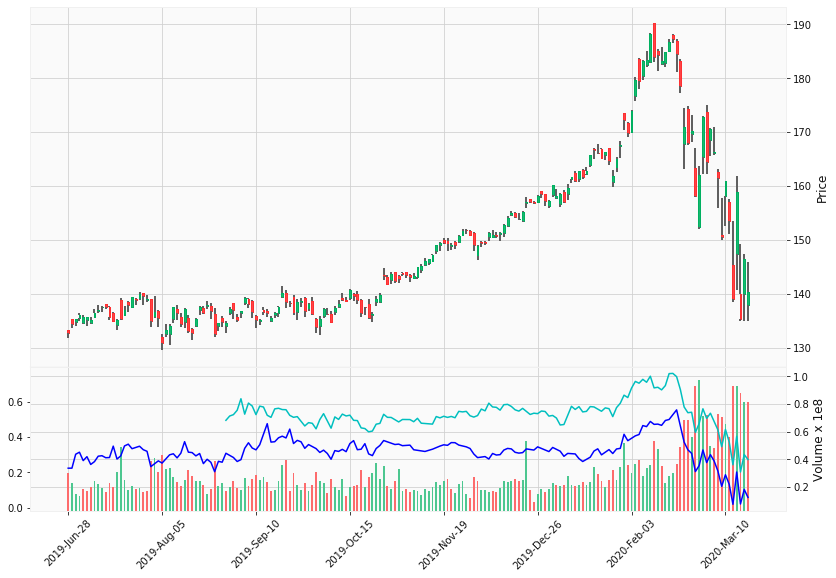

In [121]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import mplfinance as mpf
style.use('ggplot')

plot_data = ordered_data.tail(round(365/2))
mom6 = mpf.make_addplot(plot_data['MSFT','Momentum_6mo'], panel='lower', color='b')
mom12 = mpf.make_addplot(plot_data['MSFT','Momentum_1y'], panel='lower', color='c')
mpf.plot(plot_data['MSFT'], addplot=[mom6, mom12], type='candle', volume=True, figratio=(15,10), 
         style='yahoo')

The calculated values for all tickers in the index is seen here. The values are sorted from highest price momentum (1year) to lowest.

In [122]:
momentum = momentum_data.reorder_levels([1,0], axis=1).tail(1)['Close'].T
momentum.columns = ['Close']
momentum['Momentum_1y'] = momentum_data.reorder_levels([1,0], axis=1).tail(1)['Momentum_1y'].T
momentum['Momentum_6mo'] = momentum_data.reorder_levels([1,0], axis=1).tail(1)['Momentum_6mo'].T
momentum = momentum.sort_values('Momentum_1y', ascending=False)
momentum

,Close,Momentum_1y,Momentum_6mo
PG,117.449997,0.495899,0.091402
SO,55.919998,0.390343,0.042134
COST,307.500000,0.346317,0.171198
WMT,122.580002,0.334731,0.119883
LLY,143.089996,0.308245,0.313023
NEE,210.639999,0.289344,0.044944
MSFT,140.399994,0.272119,0.058024
TGT,102.820000,0.268085,0.210222
TMO,302.980011,0.250012,0.033738
DHR,128.139999,0.205273,-0.101358


An Alternative method to compare the price momentum between stocks in the index is a pareto plot as shown here. 

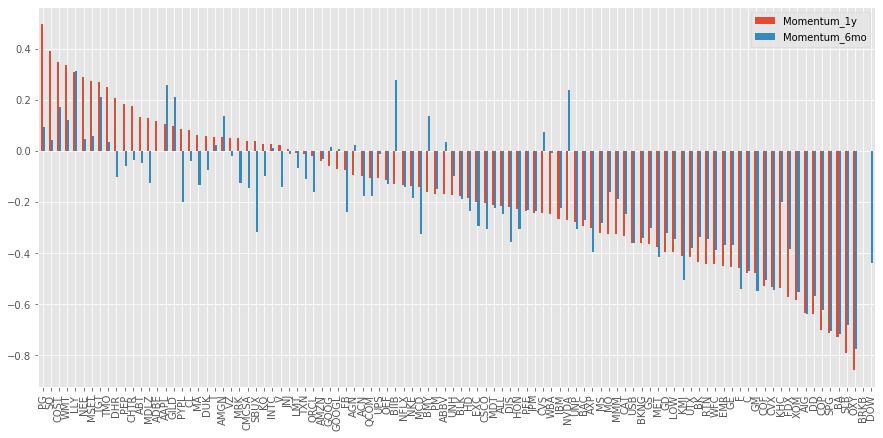

In [123]:
momentum[['Momentum_1y','Momentum_6mo']].plot.bar(figsize=(15,7))

### 5.2 Relative Strength of the Share Price vs the Market

In [124]:
all_data = pd.concat([momentum, financials], axis=1, sort=False)
momentum['RelativeStrength_1y'] = (((all_data['Momentum_1y'] + 1) / (all_data['Momentum_1y'][index_ticker] + 1))-1)
momentum['RelativeStrength_6mo'] = (((all_data['Momentum_6mo'] + 1) / (all_data['Momentum_6mo'][index_ticker]+ 1))-1)

### 5.3 Proximity of the Current Share Price to the 52 Week High

In [125]:
momentum['PriceVs52WeekHigh'] = (all_data['Close']-all_data['fiftyTwoWeekHigh']) / all_data['fiftyTwoWeekHigh']

### 5.4 Moving Average Ratio - 50 Day vs 200 Day

In [126]:
momentum['50dMAvs200dMA'] = all_data['fiftyDayAverage']/all_data['twoHundredDayAverage']

### 5.5 Final Model

First we multiply all individual metrics by their weights.

In [133]:
momentum['Model_Value'] = (w_a * momentum['RelativeStrength_1y'] + w_b * momentum['RelativeStrength_6mo'] +
                              w_c * momentum['PriceVs52WeekHigh'] + w_d * momentum['50dMAvs200dMA'])

The individual stocks are then ranked against one another and sorted from highest to lowest.

In [134]:
momentum['Rank'] = momentum['Model_Value'].rank(ascending=False)
all_data = pd.concat([momentum, financials], axis=1, sort=False)
all_data.sort_values('Rank', ascending=True, inplace=True)
all_data

,Close,Momentum_1y,Momentum_6mo,RelativeStrength_1y,RelativeStrength_6mo,PriceVs52WeekHigh,50dMAvs200dMA,Price_Momentum,Model_Value,Rank,algorithm,ask,askSize,averageDailyVolume10Day,averageVolume,averageVolume10days,beta,bid,bidSize,circulatingSupply,currency,dayHigh,dayLow,dividendRate,dividendYield,exDividendDate,expireDate,fiftyDayAverage,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiveYearAvgDividendYield,forwardPE,fromCurrency,lastMarket,marketCap,maxAge,maxSupply,navPrice,open,openInterest,payoutRatio,previousClose,priceHint,priceToSalesTrailing12Months,regularMarketDayHigh,regularMarketDayLow,regularMarketOpen,regularMarketPreviousClose,regularMarketVolume,startDate,strikePrice,toCurrency,totalAssets,tradeable,trailingAnnualDividendRate,trailingAnnualDividendYield,trailingPE,twoHundredDayAverage,volume,volume24Hr,volumeAllCurrencies,yield,ytdReturn
LLY,143.089996,0.308245,0.313023,0.474529,0.507196,-0.0323257,1.08179,0.507797,0.507797,1.0,None,136.53,900,6379600,4839274,6379600,0.361045,132.06,1300,None,USD,137.19,132.98,2.96,0.0213,2020-02-13,-,135.631,147.87,101.36,2.38,17.6481,None,None,130559123456,1,None,None,134,None,0.5202,138.72,2,5.84955,137.19,132.98,134,138.72,3204528,-,None,None,None,True,2.58,0.0185986,15.3402,125.377,3204528,None,None,None,None
COST,307.500000,0.346317,0.171198,0.517440,0.344398,-0.0546025,1.01181,0.454761,0.454761,2.0,None,288.57,1000,5448328,3425717,5448328,0.92399,286.49,1200,None,USD,288.8,280.9,2.6,0.0091,2020-02-06,-,302.858,325.26,233.05,1.01,30.7704,None,None,126636310528,1,None,None,282.36,None,0.3052,285.13,2,0.799724,288.8,280.9,282.36,285.13,3745783,-,None,None,None,True,2.6,0.00911865,33.6636,299.323,3745783,None,None,None,None
PG,117.449997,0.495899,0.091402,0.686034,0.252801,-0.0830666,0.957393,0.45329,0.45329,3.0,None,110.34,900,16331871,10443679,16331871,0.424386,109.6,800,None,USD,112.18,107,2.98,0.0271,2020-01-23,-,116.155,128.09,94.34,3.09,20.8645,None,None,269984972800,1,None,None,107.95,None,1.6789,110,2,3.87943,112.18,107,107.95,110,10661774,-,None,None,None,True,2.955,0.0268636,61.2836,121.325,10661774,None,None,None,None
WMT,122.580002,0.334731,0.119883,0.504382,0.285494,-0.0429419,0.979005,0.431485,0.431485,4.0,None,114.7,1400,13582885,9344014,13582885,0.432304,114.66,900,None,USD,115.53,111.8,2.16,0.019,2020-05-07,-,114.855,128.08,96.79,2.45,20.9431,None,None,323276439552,1,None,None,112.15,None,0.4085,113.62,2,0.616982,115.53,111.8,112.15,113.62,9217063,-,None,None,None,True,2.12,0.0186587,21.9923,117.318,9217063,None,None,None,None
GILD,79.419998,0.096460,0.208813,0.235825,0.387575,-0.0761894,1.07998,0.406798,0.406798,5.0,None,72.65,900,18219457,19736600,18219457,0.985748,72.51,900,None,USD,74.39,72,2.72,0.0358,2020-03-12,-,72.2569,85.97,60.89,None,11.2768,None,None,91291541504,1,None,None,74.32,None,0.5972,74.76,2,4.06662,74.39,72,74.32,74.76,12177608,-,None,None,None,True,2.52,0.0337079,17.1825,66.9056,12177608,None,None,None,None
TGT,102.820000,0.268085,0.210222,0.429264,0.389193,-0.210534,0.929299,0.384305,0.384305,6.0,None,95.5,900,6993842,6165859,6993842,0.618368,95.27,900,None,USD,96.14,91.29,2.64,0.0284,2020-05-19,-,105.641,130.24,70.03,3.19,13.0686,None,None,47726645248,1,None,None,91.64,None,0.4101,92.97,2,0.611003,96.14,91.29,91.64,92.97,8476038,-,None,None,None,True,2.6,0.027966,14.9725,113.678,8476038,None,None,None,None
SO,55.919998,0.390343,0.042134,0.567062,0.196247,-0.213502,0.96779,0.379399,0.379399,7.0,None,50.69,1000,8906528,6308059,8906528,0.391132,50.14,900,None,USD,52.43,49.26,2.48,0.0458,2020-02-14,-,60.5231,71.1,41.96,4.61,15.1939,None,None,52859092992,1,None,None,51.9,None,0.5467,54.14,2,2.46786,52.43,49.26,51.9,54.14,6784282,-,None,None,None,True,2.46,0.0454378,11.1422,62.5374,6784282,None,None,None,None
AAPL,246.669998,0.104637,0.257781,0.245041,0.443785,-0.247613,1.03021,0.367855,0.367855,8.0,None,242.45,1100,62455585,49330169,62455585,1.29295,242.8,800,None,USD,248.72,239.13,3.08,0.0121,2020-02-07,-,279.205,327.85,170.27,1.6,15.8077,None,Non

The stock list is then colourized by the buy-hold-sell limits in the configuration file. A version of the model output is saved as a csv and an excel file in the outputs folder.

In [136]:
import openpyxl
def highlight_cols(x):
    df = x.copy()
    df['Close'] = 'background-color: white'
    df.loc[df.Rank <= buy_limit, 'Close'] = 'background-color: #5fba7d'
    df.loc[(df.Rank > buy_limit) & (df.Rank <= buy_limit+hold_limit), 'Close'] = 'background-color: yellow'
    df.loc[df.Rank > buy_limit+hold_limit, 'Close'] = 'background-color: #d65f5f'
    for col in df.columns:
        df.loc[:, col] = df['Close']
    return df

if not os.path.exists('output'):
    os.makedirs('output')
all_data.to_csv('output/BuyHoldSell.csv')
all_data.style.apply(highlight_cols, axis=None).to_excel('output/BuyHoldSell.xlsx', engine='openpyxl')
all_data.style.apply(highlight_cols, axis=None)